In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import healpy as hp
from rubin_sim.utils import healbin
import pandas as pd
from rubin_sim.scheduler.utils import empty_observation
from astropy import units
from astropy.coordinates import Angle
from pointing_survey import PointingsSurvey
from rubin_sim.scheduler.schedulers import Core_scheduler
from rubin_sim.scheduler import sim_runner
from rubin_sim.scheduler.modelObservatory import Model_observatory

from rubin_sim.scheduler.surveys import BaseSurvey
from rubin_sim.scheduler.utils import empty_observation

import pickle

In [2]:
tiles = pd.read_csv('/Users/yoachim/git_repos/ts_fbs_utils/python/lsst/ts/fbs/utils/data/auxtel_tiles.txt', delimiter=' ')

In [3]:
tiles

,Survey,Name,RA,Dec
0,LATISS_POLE,001,00:00:00.00,-89:53:48.23
1,LATISS_POLE,002,02:10:54.54,-89:53:48.23
2,LATISS_POLE,003,04:21:49.09,-89:53:48.23
3,LATISS_POLE,004,06:32:43.63,-89:53:48.23
4,LATISS_POLE,005,08:43:38.18,-89:53:48.23
...,...,...,...,...
1626,AUXTEL_DRP_IMAGING,A2390_060,21:53:13.25,+17:58:37.05
1627,AUXTEL_DRP_IMAGING,A2390_061,21:53:36.96,+17:58:37.05
1628,AUXTEL_DRP_IMAGING,A2390_062,21:54:00.67,+17:58:37.05
1629,AUXTEL_DRP_IMAGING,A2390_063,21:54:24.38,+17:58:37.05


In [4]:
obs = empty_observation()
obs = np.zeros(tiles['Survey'].size, dtype=obs.dtype)

In [5]:
obs['note'] = tiles['Survey'] + tiles['Name']
obs['RA'] = Angle(tiles['RA'],unit=units.hourangle).rad
obs['dec'] = Angle(tiles['Dec'],unit=units.degree).rad

obs['flush_by_mjd'] = 0.
obs['nexp'] = 1
obs['filter'] = 'r'
obs['exptime'] = 60.
# obs['rotSkyPos'] = np.nan

In [6]:
# Make a scheduler with one survey object. Dumpign all the pointings in.
# Of course, we could divide them up into different survey objects if that was handy.
ps = PointingsSurvey(obs)
sched = Core_scheduler([ps])

In [7]:
mo = Model_observatory()

In [8]:
conditions = mo.return_conditions()
ack = ps.generate_observations(conditions)
ack

/Users/yoachim/git_repos/22_Scratch/auxTel_test/pointing_survey.py:141: RuntimeWarning: invalid value encountered in true_divide
  result = np.floor(1.+self.n_obs/sum_obs)


[array([(0, 5.39245725, -0.08614068, 0., 0., 60., 'r', 0., 0., 1, 0., 0., 0., 0., 0., 0, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 'AUXTEL_DRP_IMAGINGSDSS-J203722_057', 0, 0, 0, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0)],
       dtype=[('ID', '<i8'), ('RA', '<f8'), ('dec', '<f8'), ('mjd', '<f8'), ('flush_by_mjd', '<f8'), ('exptime', '<f8'), ('filter', '<U1'), ('rotSkyPos', '<f8'), ('rotSkyPos_desired', '<f8'), ('nexp', '<i8'), ('airmass', '<f8'), ('FWHM_500', '<f8'), ('FWHMeff', '<f8'), ('FWHM_geometric', '<f8'), ('skybrightness', '<f8'), ('night', '<i8'), ('slewtime', '<f8'), ('visittime', '<f8'), ('slewdist', '<f8'), ('fivesigmadepth', '<f8'), ('alt', '<f8'), ('az', '<f8'), ('pa', '<f8'), ('clouds', '<f8'), ('moonAlt', '<f8'), ('sunAlt', '<f8'), ('note', '<U40'), ('field_id', '<i8'), ('survey_id', '<i8'), ('block_id', '<i8'), ('lmst', '<f8'), ('rotTelPos', '<f8'), ('rotTelPos_backup', '<f8'), ('moonAz', '<f8'), ('sunAz', '<f8'), ('sunRA', '<f8'), ('sunDec', '<f8'), ('moonR

In [9]:
mo, sched, completed_obs = sim_runner(mo, sched, survey_length=3)


progress = 99.49%

/Users/yoachim/git_repos/rubin_sim/rubin_sim/skybrightness_pre/SkyModelPre.py:272: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn(


Skipped 0 observations
Flushed 0 observations from queue for being stale
Completed 1249 observations
ran in 0 min = 0.0 hours
Writing results to  None


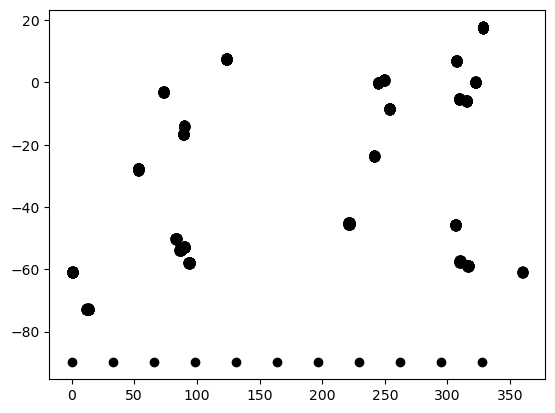

In [10]:
plt.plot(np.degrees(obs['RA']), np.degrees(obs['dec']), 'ko')

In [11]:
file = open('save_test.pkl', 'wb')
pickle.dump(sched, file)
file.close()

In [18]:
# How large is it to save this thing
from subprocess import Popen
Popen(['ls -lh *.pkl'], shell=True)

<Popen: returncode: None args: ['ls -lh *.pkl']>

-rw-r--r--  1 yoachim  staff   3.4M Sep 21 20:16 save_test.pkl


Text(0, 0.5, 'Dec')

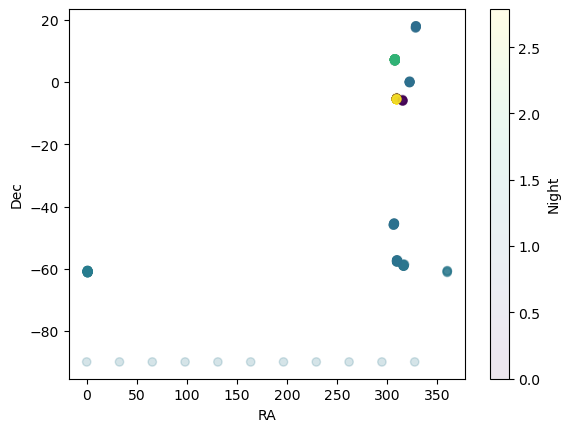

In [17]:
plt.scatter(np.degrees(completed_obs['RA']), np.degrees(completed_obs['dec']),
            c=completed_obs['mjd']-completed_obs['mjd'].min(), alpha=0.1)
cb = plt.colorbar()
cb.set_label('Night')
plt.xlabel('RA')
plt.ylabel('Dec')